# FDA HW1 Part2

## Descrption
The dataset is from Kaggle: [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('data/StudentsPerformance.csv')

## Attribute description
* gender: male/female
* race/ethnicity: the race/enthicity groups from groupA to groupE
* parental level of education: the education level of students' parent
* lunch: lunch types (standard or free/reduced)
* test preparation course: if the student completed the test preparation course or not
* math score
* reading score
* writing score

In [81]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [82]:
df['Avg score']=((df['math score']+df['reading score']+df['writing score'])/3).round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


I add a attribute here: 'Avg score'.

## Look at some basic/statistical information

In [7]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

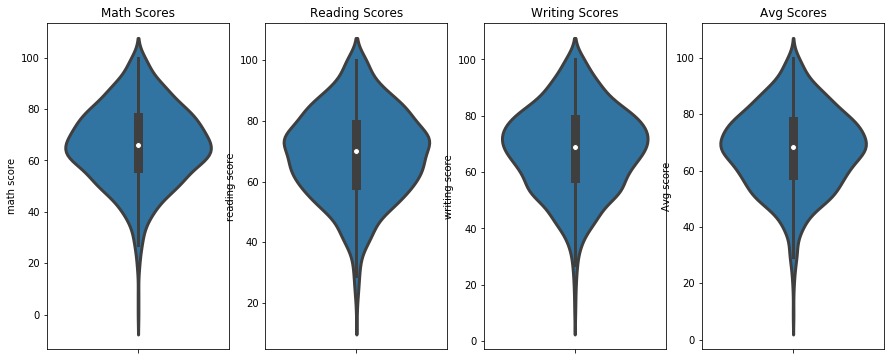

In [90]:
plt.figure(figsize=(15,6))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y='math score',data=df,linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading score',data=df,linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=df,linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Avg Scores')
sns.violinplot(y='Avg score',data=df,linewidth=3)
plt.show()

From above plots, we can see that most students got scores between 60 and 80.

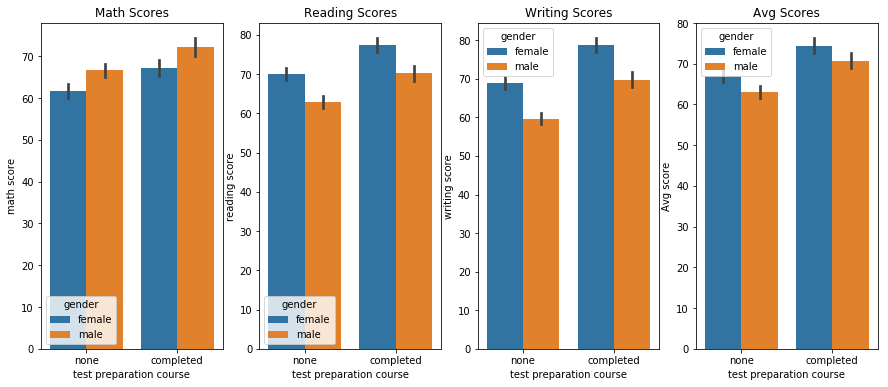

In [89]:
plt.figure(figsize=(15,6))
plt.subplot(1, 4, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender')
plt.title('Math Scores')
plt.subplot(1, 4, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender')
plt.title('Reading Scores')
plt.subplot(1, 4, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender')
plt.title('Writing Scores')
plt.subplot(1, 4, 4)
sns.barplot(x='test preparation course',y='Avg score',data=df,hue='gender')
plt.title('Avg Scores')
plt.show()

Here we can see male get greater score on math, and female get greater score on reading and writing. Female also get higher average score on these 3 majors than male. Futhermore, students who had completed the test preparation course get better score too.

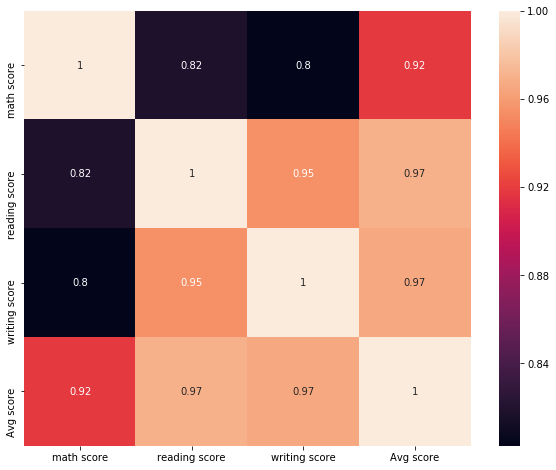

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

From above heat map of the scores, we can find that they all get a high corralation with each other.

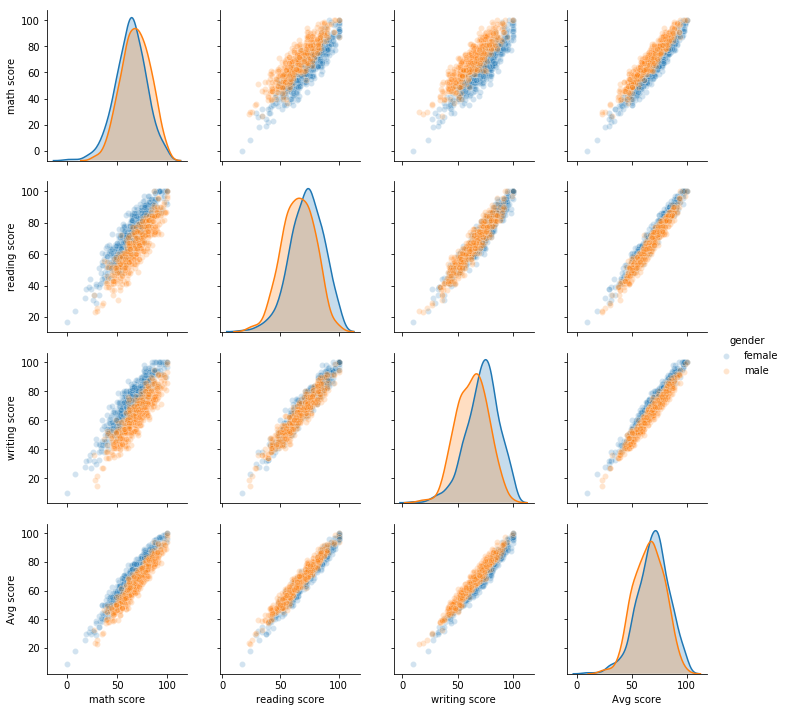

In [109]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2})

Let's look at the pair plot, it's not suprise that all kinds of scores increases linearly with each other.

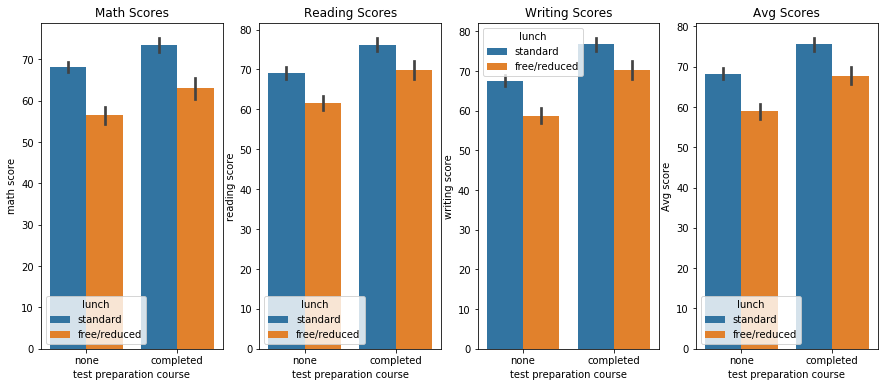

In [94]:
plt.figure(figsize=(15,6))
plt.subplot(1, 4, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch')
plt.title('Math Scores')
plt.subplot(1, 4, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch')
plt.title('Reading Scores')
plt.subplot(1, 4, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch')
plt.title('Writing Scores')
plt.subplot(1, 4, 4)
sns.barplot(x='test preparation course',y='Avg score',data=df,hue='lunch')
plt.title('Avg Scores')
plt.show()

Students having standard lunch got higher score.

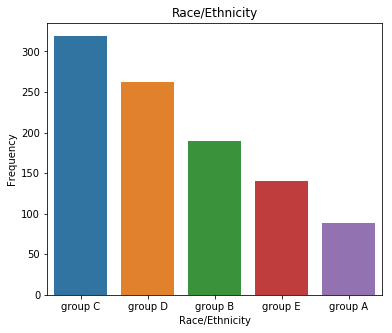

In [68]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=df['race/ethnicity'].value_counts().index, y=df['race/ethnicity'].value_counts().values)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity')
plt.show()

GroupC have most students, while groupA have the least.

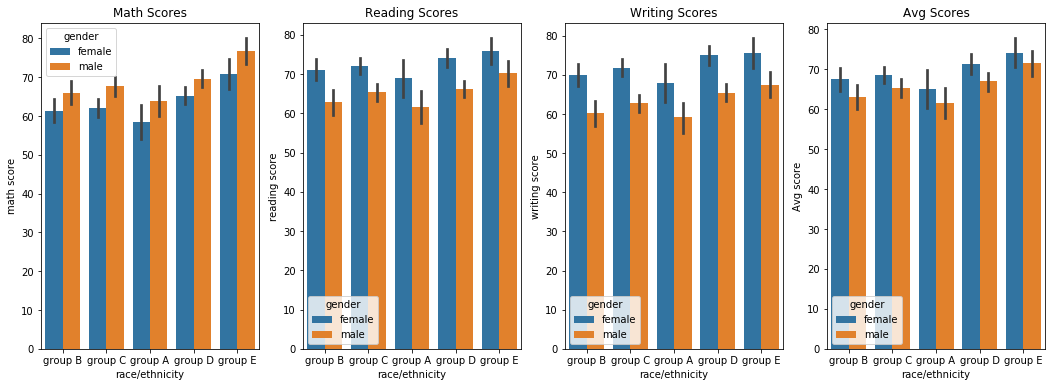

In [97]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender')
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender')
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender')
plt.subplot(1, 4, 4)
plt.title('Avg Scores')
sns.barplot(x='race/ethnicity',y='Avg score',data=df,hue='gender')
plt.show()

Above plots shows how students perform in differents groups. We can find that students in groupE are good at math, and their average score is better as well.

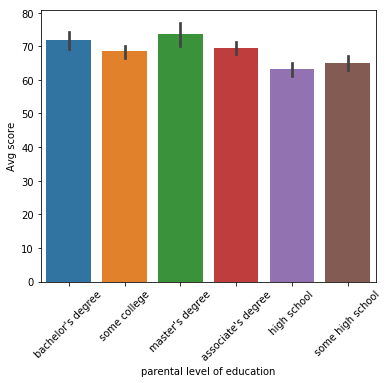

In [98]:
plt.figure(figsize=(6, 5))
sns.barplot(x="parental level of education",y="Avg score",data=df)
plt.xticks(rotation=45)
plt.show()

Above plot shows how students perform (in Avg Score) with different parent education level. We can see that students with their parents having master degree perform the best, while those with their parents having high school education level perform the worst.